In [96]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pyexcel_xlsx
%pylab inline
#%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['boxplot', 'colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [97]:
pylab.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams.update({'font.size': 25,'legend.fontsize':25, 'lines.markersize' : 15, 'xtick.labelsize': 20, 'ytick.labelsize': 20 })#,'font.family': 'serif'})
rc('axes', linewidth=3)
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import AutoMinorLocator


# Evaluate Raw Data

In [98]:
data = pd.read_excel(r'/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/PYTHON/DamageData.xlsx')
df = pd.DataFrame(data)
df = df.set_index(['FIPS'])
df.describe()

,Count_,Sum_NA,Sum_AFF,Sum_DES
count,905.000000,905.000000,905.000000,905.000000
mean,1666.792265,1609.773481,53.327072,3.691713
std,957.592920,922.983960,67.493192,9.579834
min,0.000000,0.000000,0.000000,0.000000
25%,971.000000,937.000000,7.000000,0.000000
50%,1510.000000,1435.000000,27.000000,0.000000
75%,2285.000000,2188.000000,74.000000,3.000000
max,7069.000000,7058.000000,425.000000,145.000000


In [99]:
df_hist1 = pd.DataFrame(df['Count_'])
df_hist2 = pd.DataFrame(df[['Sum_NA', 'Sum_AFF', 'Sum_DES']])

In [100]:
# df_hist2.plot.hist(subplots = True, legend = True, layout =(1,3), ec='white', grid = True)

Text(0.5,0.04,'Sum per Census Tract')

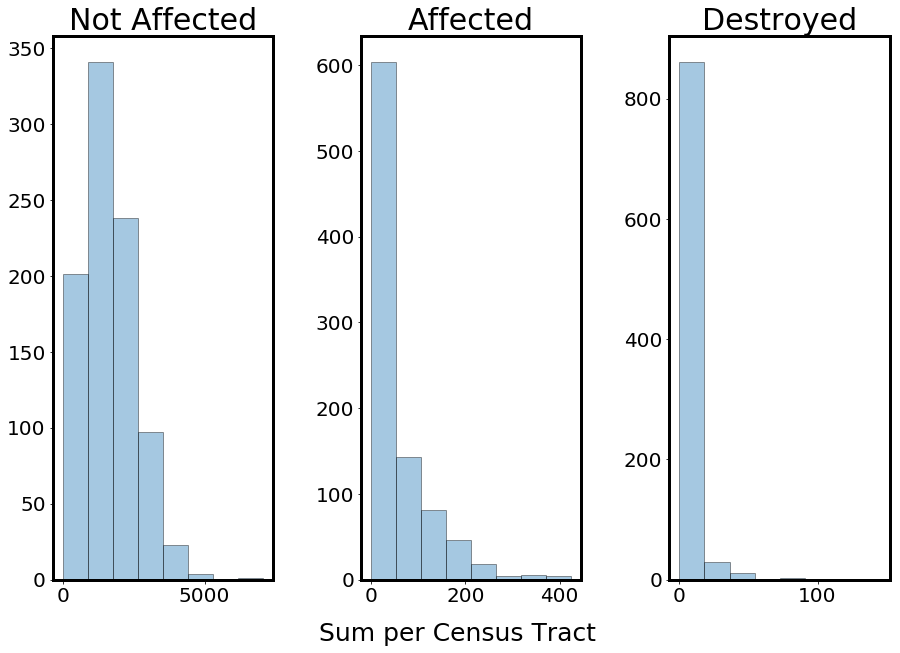

In [101]:
plt.rcParams["patch.force_edgecolor"] = True
fig, ax = plt.subplots(1,3,figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
sns.distplot(df_hist2['Sum_NA'].values,bins=8,kde=False,ax=ax[0])
sns.distplot(df_hist2['Sum_AFF'].values,bins=8,kde=False,ax=ax[1])
sns.distplot(df_hist2['Sum_DES'].values,bins=8,kde=False,ax=ax[2])
ax[0].set_title('Not Affected')
ax[1].set_title('Affected')
ax[2].set_title('Destroyed')
fig.text(0.5, 0.04, 'Sum per Census Tract', ha='center')


# Create Damage Indices

O_Ind = Original Index (AFF + (DES*2) / Total)   
R_Ind = Ratio Index ((AFF + DES) / Total)  
RA_Ind = Raio Affected Index  (AFF/Total)  
RD_Ind = Ration Destroyed Index (DES / Total  
WD_Ind = weighted destroyed index (Aff + (DES * 10) / Total)

In [102]:
df['O_Ind'] = (df.Sum_AFF + (df.Sum_DES * 2))/(df.Count_)
df['R_Ind'] = (df.Sum_AFF + (df.Sum_DES))/(df.Count_)
df['RA_Ind'] = (df.Sum_AFF)/(df.Count_)
df['RD_Ind'] = (df.Sum_DES)/(df.Count_)
df['WD_Ind'] = (df.Sum_AFF + (df.Sum_DES * 10))/(df.Count_)

In [103]:
df.fillna(0, inplace=True)

In [104]:
df.describe()

,Count_,Sum_NA,Sum_AFF,Sum_DES,O_Ind,R_Ind,RA_Ind,RD_Ind,WD_Ind
count,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000
mean,1666.792265,1609.773481,53.327072,3.691713,0.035629,0.033240,0.030850,0.002389,0.054745
std,957.592920,922.983960,67.493192,9.579834,0.046323,0.040553,0.036452,0.009631,0.113289
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,971.000000,937.000000,7.000000,0.000000,0.006818,0.006731,0.006112,0.000000,0.008048
50%,1510.000000,1435.000000,27.000000,0.000000,0.022890,0.022033,0.021277,0.000000,0.027827
75%,2285.000000,2188.000000,74.000000,3.000000,0.048136,0.045425,0.042514,0.001954,0.065990
max,7069.000000,7058.000000,425.000000,145.000000,0.560000,0.480000,0.400000,0.200000,2.100000


Text(0.5,1,'Damage Index \n')

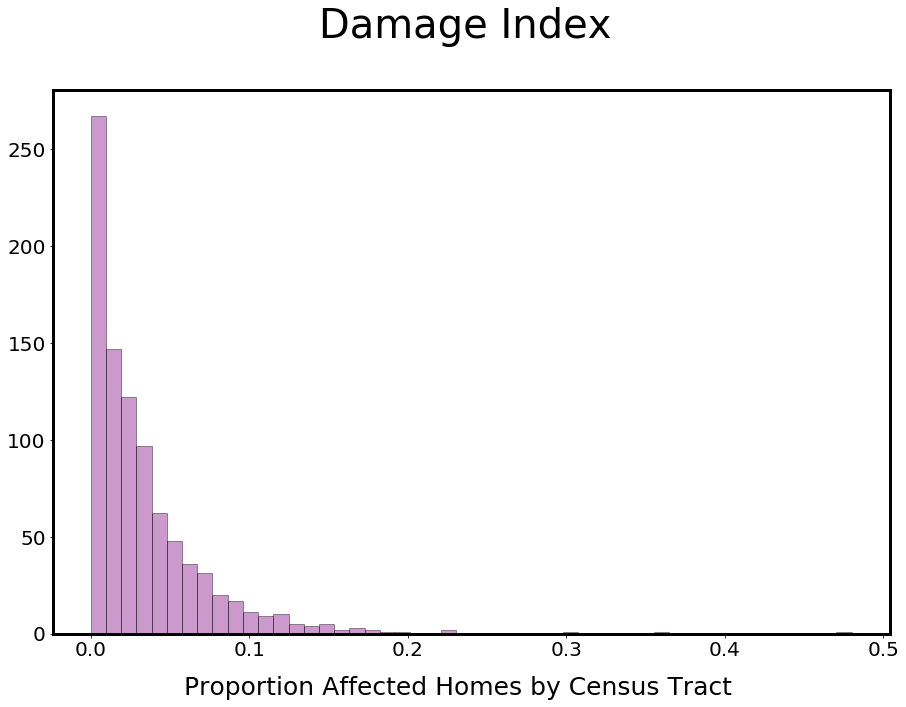

In [105]:
import matplotlib.colors as colors
fig, ax = plt.subplots(1,1,figsize=(15, 10))
plt.rcParams["patch.force_edgecolor"] = True
sns.distplot(df['R_Ind'].values,kde=False,color='purple')
fig.text(0.5, 0.04, 'Proportion Affected Homes by Census Tract', ha='center')
ax.set_title('Damage Index \n', fontsize = 40)

Text(0.5,0.04,'Sum per Census Tract')

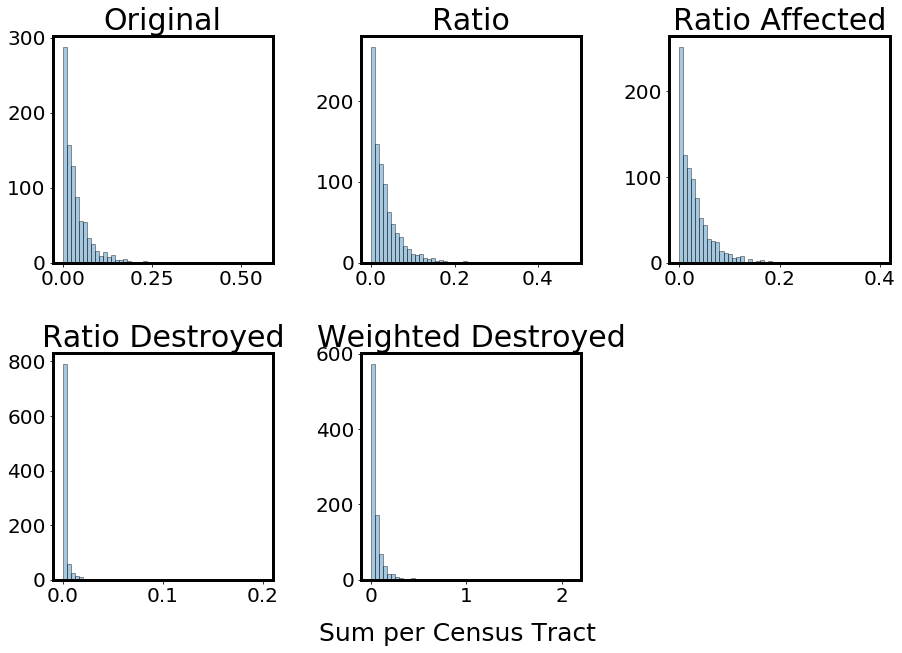

In [106]:
plt.rcParams["patch.force_edgecolor"] = True
fig, ax = plt.subplots(2,3,figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

sns.distplot(df['O_Ind'].values,kde=False,ax=ax[0,0])
sns.distplot(df['R_Ind'].values,kde=False,ax=ax[0,1])
sns.distplot(df['RA_Ind'].values,kde=False,ax=ax[0,2])
sns.distplot(df['RD_Ind'].values,kde=False,ax=ax[1,0])
sns.distplot(df['WD_Ind'].values,kde=False,ax=ax[1,1])
fig.delaxes(ax[1,2])

ax[0,0].set_title('Original')
ax[0,1].set_title('Ratio')
ax[0,2].set_title('Ratio Affected')
ax[1,0].set_title('Ratio Destroyed')
ax[1,1].set_title('Weighted Destroyed')


fig.text(0.5, 0.04, 'Sum per Census Tract', ha='center')

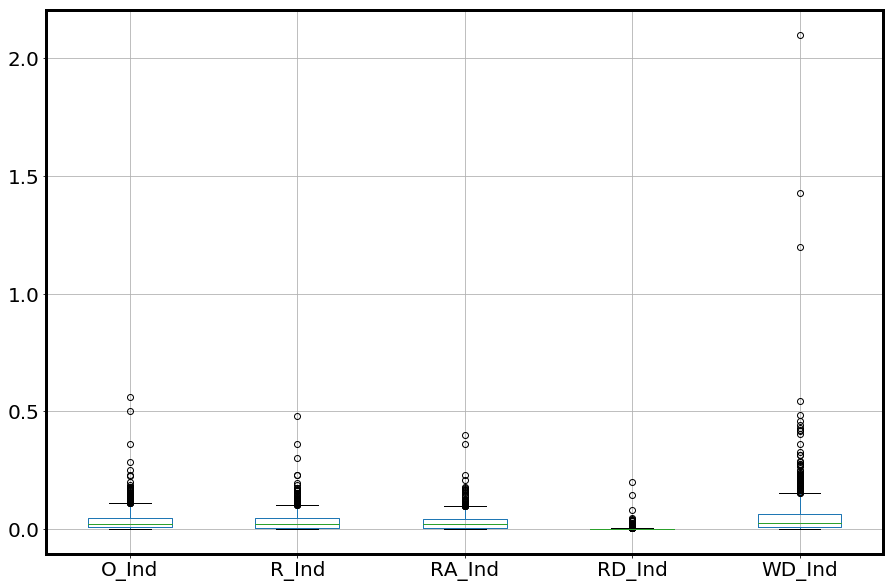

In [107]:
boxplot = df.boxplot(column=['O_Ind', 'R_Ind', 'RA_Ind', 'RD_Ind','WD_Ind'])


In [108]:
df.columns

Index(['Count_', 'Sum_NA', 'Sum_AFF', 'Sum_DES', 'O_Ind', 'R_Ind', 'RA_Ind',
       'RD_Ind', 'WD_Ind'],
      dtype='object')

In [109]:
df_orig = df.drop(['Count_', 'Sum_NA', 'Sum_AFF', 'Sum_DES','RA_Ind',
       'RD_Ind', 'WD_Ind'], axis=1)

In [110]:
df_orig.to_excel("/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/origs.xlsx")

# Drop all where no damage

In [111]:
df_orig.astype(bool).sum(axis=0)

O_Ind    788
R_Ind    788
dtype: int64

In [112]:
df_No0 = df_orig[df.R_Ind != 0]


In [113]:
df_No0.rename(columns={"R_Ind": "R_I_No0"}, inplace = True)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [114]:
df_No0.drop('O_Ind', axis=1, inplace=True)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [115]:
df_No0

,R_I_No0
FIPS,
72097081512,0.058057
72023830603,0.000234
72023830604,0.001556
72023830101,0.015488
72023830102,0.014442
72023830200,0.035561
72023830300,0.005752
72023830400,0.002161
72023830502,0.024807


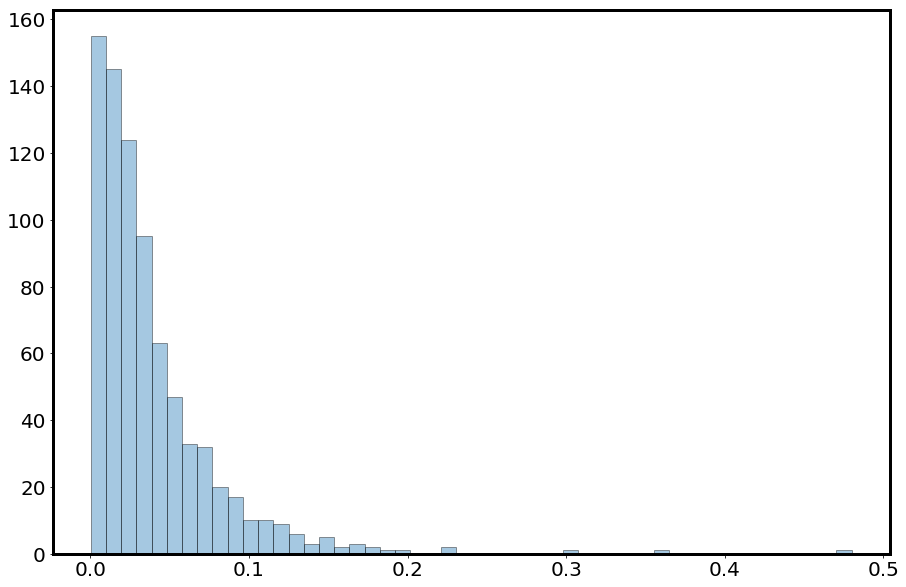

In [116]:
sns.distplot(df_No0['R_I_No0'].values,kde=False)

In [117]:
# plt.rcParams["patch.force_edgecolor"] = True
# fig, ax = plt.subplots(1,1,figsize=(15, 10))
# fig.subplots_adjust(hspace=0.4, wspace=0.4)

# sns.distplot(df_No0['O_Ind'].values,kde=False,ax=ax[0,0])
# sns.distplot(df_No0['R_I_No0'].values,kde=False,ax=ax[0,1])
# sns.distplot(df_No0['RA_Ind'].values,kde=False,ax=ax[0,2])
# sns.distplot(df_No0['RD_Ind'].values,kde=False,ax=ax[1,0])
# sns.distplot(df_No0['WD_Ind'].values,kde=False,ax=ax[1,1])
# fig.delaxes(ax[1,2])

# ax[0,0].set_title('Original')
# ax[0,1].set_title('Ratio')
# ax[0,2].set_title('Ratio Affected')
# ax[1,0].set_title('Ratio Destroyed')
# ax[1,1].set_title('Weighted Destroyed')


# fig.text(0.5, 0.04, 'Sum per Census Tract', ha='center')

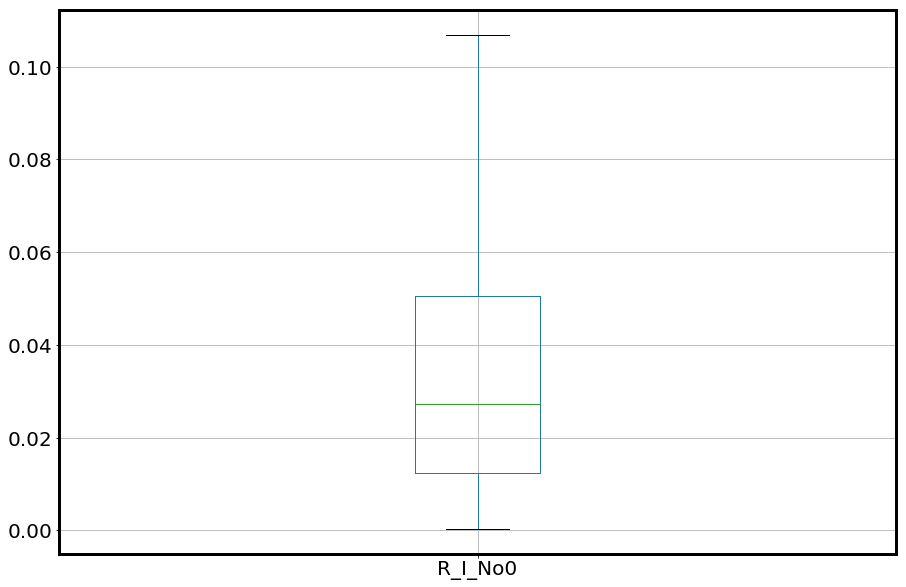

In [118]:
boxplot = df_No0.boxplot(column=['R_I_No0'], showfliers=False)

In [120]:
df_No0.to_excel("/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/No0.xlsx")

# Drop outliers with Interquartile Range

Q1 = df_No0.quantile(0.25)
Q3 = df_No0.quantile(0.75)
IQR = Q3 - Q1
((df_No0 < (Q1 - 1.5 * IQR)) | (df_No0 > (Q3 + 1.5 * IQR))).sum()

## Start with dataset with dropped 0's

In [124]:
Q1 = df_No0.R_I_No0.quantile(0.25)
Q3 = df_No0.R_I_No0.quantile(0.75)
IQR = Q3 - Q1
((df_No0.R_I_No0 < (Q1 - 1.5 * IQR)) | (df_No0.R_I_No0 > (Q3 + 1.5 * IQR))).sum()

43

In [125]:
mask = ((df_No0.R_I_No0 < (Q1 - 1.5 * IQR)) | (df_No0.R_I_No0 > (Q3 + 1.5 * IQR)))

In [126]:
df_No0.R_I_No0[mask] = np.nan

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [127]:
df_No0_NoO = df_No0.dropna()

In [128]:
df_No0_NoO.rename(columns={"R_I_No0": "R_I_No0_NoO"}, inplace = True)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [129]:
df_No0_NoO

,R_I_No0_NoO
FIPS,
72097081512,0.058057
72023830603,0.000234
72023830604,0.001556
72023830101,0.015488
72023830102,0.014442
72023830200,0.035561
72023830300,0.005752
72023830400,0.002161
72023830502,0.024807


In [130]:
df_No0_NoO.to_excel("/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/No0_NoO.xlsx")

## Now IQR for Original

In [134]:
Q1 = df_orig.R_Ind.quantile(0.25)
Q3 = df_orig.R_Ind.quantile(0.75)
IQR = Q3 - Q1
((df_orig.R_Ind < (Q1 - 1.5 * IQR)) | (df_orig.R_Ind > (Q3 + 1.5 * IQR))).sum()

51

In [135]:
mask2 = ((df_orig.R_Ind < (Q1 - 1.5 * IQR)) | (df_orig.R_Ind > (Q3 + 1.5 * IQR)))

In [136]:
df_orig.R_Ind[mask2] = np.nan

In [137]:
df_NoO = df_orig.dropna()

In [138]:
df_NoO.rename(columns={"R_Ind": "R_I_NoO"}, inplace = True)
df_NoO.drop('O_Ind', axis=1, inplace=True)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [139]:
df_NoO

,R_I_NoO
FIPS,
72097081512,0.058057
72023830603,0.000234
72023830604,0.001556
72023980000,0.000000
72023990000,0.000000
72023830101,0.015488
72023830102,0.014442
72023830200,0.035561
72023830300,0.005752


In [140]:
df_NoO.to_excel("/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/NoO.xlsx")

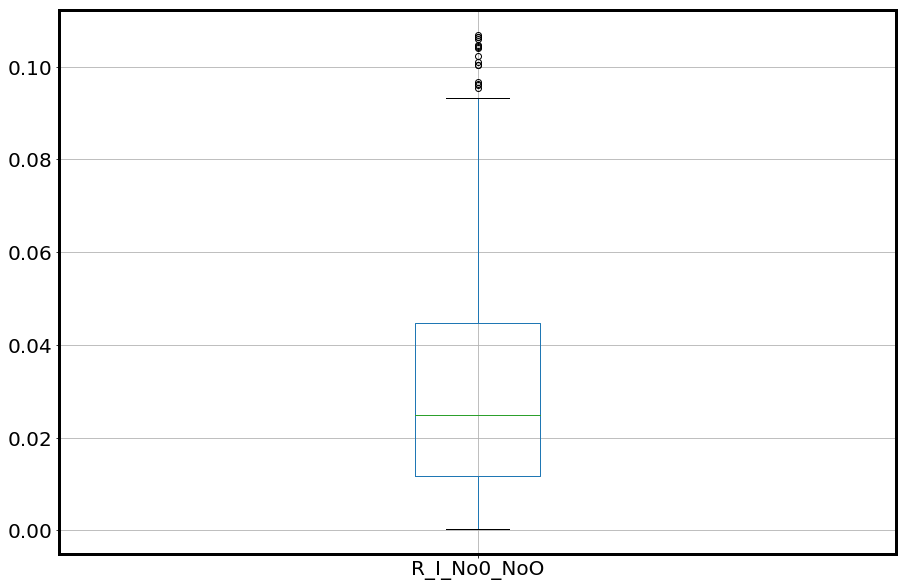

In [142]:
boxplot = df_No0_NoO.boxplot(column=['R_I_No0_NoO'])

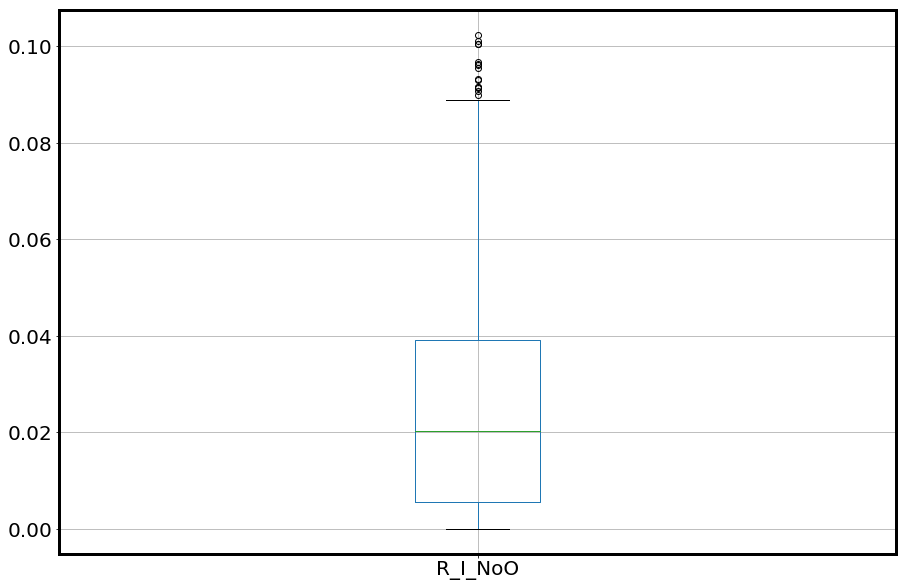

In [143]:
boxplot = df_NoO.boxplot(column=['R_I_NoO'])

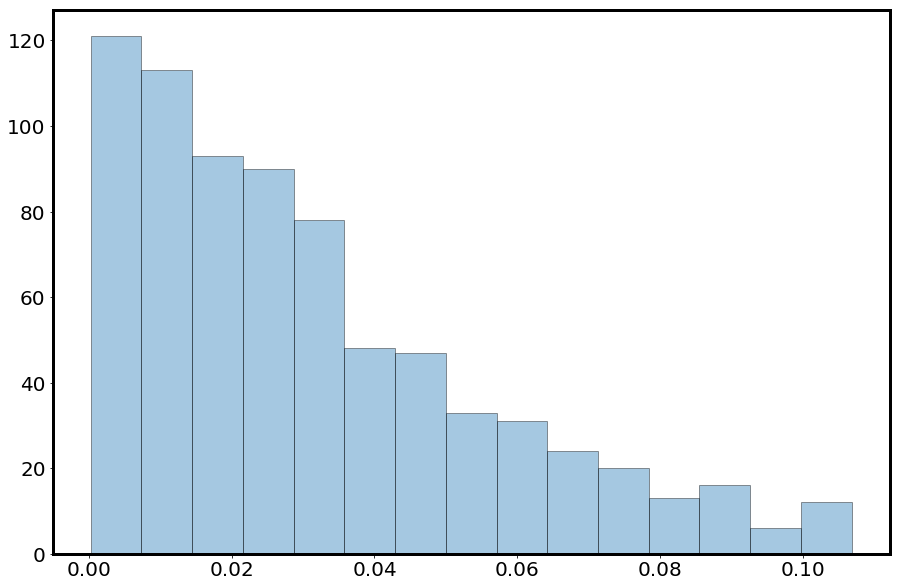

In [144]:
sns.distplot(df_No0_NoO['R_I_No0_NoO'].values,kde=False)

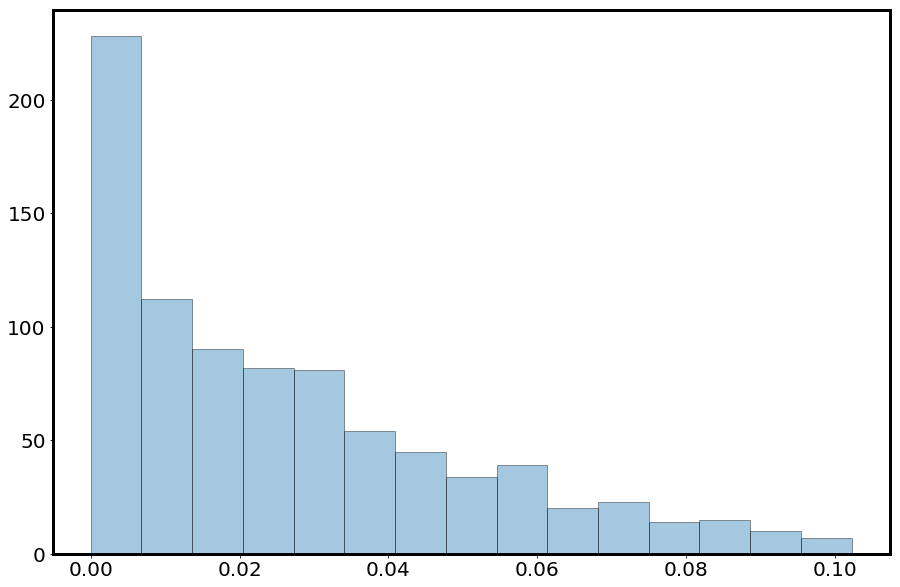

In [145]:
sns.distplot(df_NoO['R_I_NoO'].values,kde=False)

In [146]:
# plt.rcParams["patch.force_edgecolor"] = True
# fig, ax = plt.subplots(2,3,figsize=(15, 10))
# fig.subplots_adjust(hspace=0.4, wspace=0.4)

# sns.distplot(df_No0_NoO['O_Ind'].values,kde=False,ax=ax[0,0])
# sns.distplot(df_No0_NoO['R_Ind'].values,kde=False,ax=ax[0,1])
# sns.distplot(df_No0_NoO['RA_Ind'].values,kde=False,ax=ax[0,2])
# sns.distplot(df_No0_NoO['RD_Ind'].values,kde=False,ax=ax[1,0])
# sns.distplot(df_No0_NoO['WD_Ind'].values,kde=False,ax=ax[1,1])
# fig.delaxes(ax[1,2])

# ax[0,0].set_title('Original')
# ax[0,1].set_title('Ratio')
# ax[0,2].set_title('Ratio Affected')
# ax[1,0].set_title('Ratio Destroyed')
# ax[1,1].set_title('Weighted Destroyed')


# fig.text(0.5, 0.04, 'Sum per Census Tract', ha='center')

# Make Classifier Index

In [149]:
df_c = df.drop(['O_Ind', 'RA_Ind', 'RD_Ind', 'WD_Ind'], axis=1)

In [150]:
df_c.head()

,Count_,Sum_NA,Sum_AFF,Sum_DES,R_Ind
FIPS,,,,,
72097081512,2687,2531,146,10,0.058057
72023830603,4269,4268,1,0,0.000234
72023830604,7069,7058,11,0,0.001556
72023980000,24,24,0,0,0.000000
72023990000,0,0,0,0,0.000000


## 4 bins

In [151]:
pd.qcut(df_c['R_Ind'], q=4)

FIPS
72097081512       (0.0454, 0.48]
72023830603    (-0.001, 0.00673]
72023830604    (-0.001, 0.00673]
72023980000    (-0.001, 0.00673]
72023990000    (-0.001, 0.00673]
72023830101     (0.00673, 0.022]
72023830102     (0.00673, 0.022]
72023830200      (0.022, 0.0454]
72023830300    (-0.001, 0.00673]
72023830400    (-0.001, 0.00673]
72023830502      (0.022, 0.0454]
72023830503     (0.00673, 0.022]
72023830504       (0.0454, 0.48]
72067820300     (0.00673, 0.022]
72079850400    (-0.001, 0.00673]
72055961000      (0.022, 0.0454]
72055961400      (0.022, 0.0454]
72055961500     (0.00673, 0.022]
72079850101    (-0.001, 0.00673]
72079850102    (-0.001, 0.00673]
72079850200    (-0.001, 0.00673]
72079850300    (-0.001, 0.00673]
72125840100     (0.00673, 0.022]
72125840200     (0.00673, 0.022]
72125840400    (-0.001, 0.00673]
72125840500    (-0.001, 0.00673]
72125840600     (0.00673, 0.022]
72125840700    (-0.001, 0.00673]
72121960300     (0.00673, 0.022]
72121960400    (-0.001, 0.00673]
     

In [152]:
pd.qcut(df_c['R_Ind'], q=4).value_counts()

(-0.001, 0.00673]    227
(0.0454, 0.48]       226
(0.022, 0.0454]      226
(0.00673, 0.022]     226
Name: R_Ind, dtype: int64

In [153]:
bin_labels_4 = ['low_d', 'medl_d', 'medh_d', 'high_d']

In [154]:
df_c['quantile_4'] = pd.qcut(df_c['R_Ind'], q=4, labels = bin_labels_4)

## 3 bins

In [155]:
pd.qcut(df_c['R_Ind'], q=3)

FIPS
72097081512       (0.035, 0.48]
72023830603    (-0.001, 0.0116]
72023830604    (-0.001, 0.0116]
72023980000    (-0.001, 0.0116]
72023990000    (-0.001, 0.0116]
72023830101     (0.0116, 0.035]
72023830102     (0.0116, 0.035]
72023830200       (0.035, 0.48]
72023830300    (-0.001, 0.0116]
72023830400    (-0.001, 0.0116]
72023830502     (0.0116, 0.035]
72023830503     (0.0116, 0.035]
72023830504       (0.035, 0.48]
72067820300    (-0.001, 0.0116]
72079850400    (-0.001, 0.0116]
72055961000     (0.0116, 0.035]
72055961400     (0.0116, 0.035]
72055961500     (0.0116, 0.035]
72079850101    (-0.001, 0.0116]
72079850102    (-0.001, 0.0116]
72079850200    (-0.001, 0.0116]
72079850300    (-0.001, 0.0116]
72125840100     (0.0116, 0.035]
72125840200     (0.0116, 0.035]
72125840400    (-0.001, 0.0116]
72125840500    (-0.001, 0.0116]
72125840600     (0.0116, 0.035]
72125840700    (-0.001, 0.0116]
72121960300     (0.0116, 0.035]
72121960400    (-0.001, 0.0116]
                     ...       
720

In [156]:
pd.qcut(df_c['R_Ind'], q=3).value_counts()

(0.035, 0.48]       302
(-0.001, 0.0116]    302
(0.0116, 0.035]     301
Name: R_Ind, dtype: int64

In [157]:
bin_labels_3 = ['low_d', 'med_d', 'high_d']

In [158]:
df_c['quantile_3'] = pd.qcut(df_c['R_Ind'], q=3, labels = bin_labels_3)

In [159]:
df_c.head()

,Count_,Sum_NA,Sum_AFF,Sum_DES,R_Ind,quantile_4,quantile_3
FIPS,,,,,,,
72097081512,2687,2531,146,10,0.058057,high_d,high_d
72023830603,4269,4268,1,0,0.000234,low_d,low_d
72023830604,7069,7058,11,0,0.001556,low_d,low_d
72023980000,24,24,0,0,0.000000,low_d,low_d
72023990000,0,0,0,0,0.000000,low_d,low_d


## Encode Classes

In [160]:
df_c.quantile_3 = pd.Categorical(df_c.quantile_3)
df_c.quantile_4 = pd.Categorical(df_c.quantile_4)

In [161]:
df_c['q3_code'] = df_c.quantile_3.cat.codes
df_c['q4_code'] = df_c.quantile_4.cat.codes

In [163]:
df_c

,Count_,Sum_NA,Sum_AFF,Sum_DES,R_Ind,quantile_4,quantile_3,q3_code,q4_code
FIPS,,,,,,,,,
72097081512,2687,2531,146,10,0.058057,high_d,high_d,2,3
72023830603,4269,4268,1,0,0.000234,low_d,low_d,0,0
72023830604,7069,7058,11,0,0.001556,low_d,low_d,0,0
72023980000,24,24,0,0,0.000000,low_d,low_d,0,0
72023990000,0,0,0,0,0.000000,low_d,low_d,0,0
72023830101,2970,2924,45,1,0.015488,medl_d,med_d,1,1
72023830102,2562,2525,37,0,0.014442,medl_d,med_d,1,1
72023830200,3965,3824,138,3,0.035561,medh_d,high_d,2,2
72023830300,2608,2593,13,2,0.005752,low_d,low_d,0,0


In [165]:
df_c.columns

Index(['Count_', 'Sum_NA', 'Sum_AFF', 'Sum_DES', 'R_Ind', 'quantile_4',
       'quantile_3', 'q3_code', 'q4_code'],
      dtype='object')

In [168]:
df_c.drop(['Count_', 'Sum_NA', 'Sum_AFF', 'Sum_DES', 'R_Ind', 'quantile_4',
       'quantile_3'], axis=1, inplace = True)

In [169]:
df_c

,q3_code,q4_code
FIPS,,
72097081512,2,3
72023830603,0,0
72023830604,0,0
72023980000,0,0
72023990000,0,0
72023830101,1,1
72023830102,1,1
72023830200,2,2
72023830300,0,0


In [170]:
df_c.rename(columns={"q3_code": "cat_3q", "q4_code":"cat_4q"}, inplace = True)

In [171]:
df_c

,cat_3q,cat_4q
FIPS,,
72097081512,2,3
72023830603,0,0
72023830604,0,0
72023980000,0,0
72023990000,0,0
72023830101,1,1
72023830102,1,1
72023830200,2,2
72023830300,0,0


In [172]:
df_c.to_excel("/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/cat.xlsx")